In [ ]:
import pandas as pd
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()
df.info()
df.isnull().sum()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop('customerID', axis=1, inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Now get dummies for others
df = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
results_df = X_test.copy()
results_df['Churn_Actual'] = y_test.values
results_df['Churn_Predicted'] = y_pred_xgb
results_df['Churn_Probability'] = y_prob_xgb
results_df.to_csv('churn_results.csv', index=False)


📊 Logistic Regression Results:

Confusion Matrix:
 [[916 117]
 [158 216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC-AUC Score: 0.835993756826853


/tmp/ipython-input-51-1144856005.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette='coolwarm')


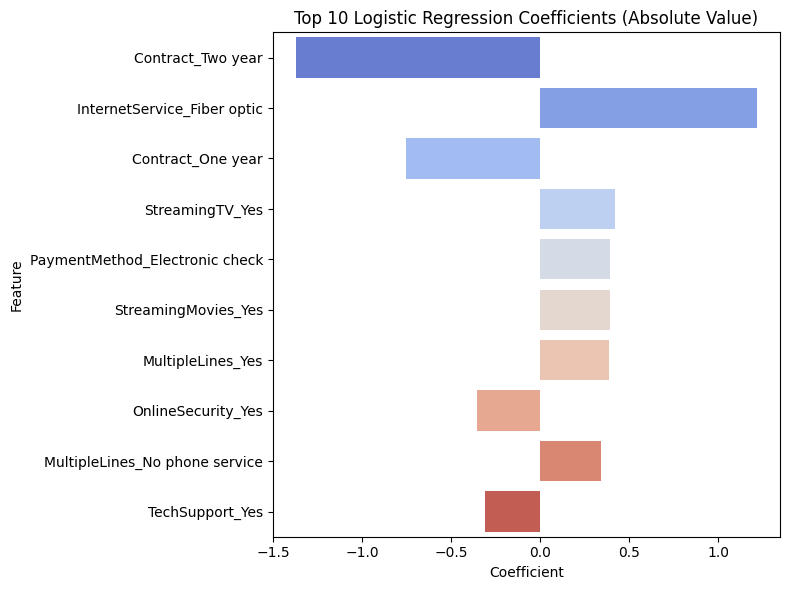


🌲 Random Forest Results:

Confusion Matrix:
 [[924 109]
 [187 187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC Score: 0.8168449197860963


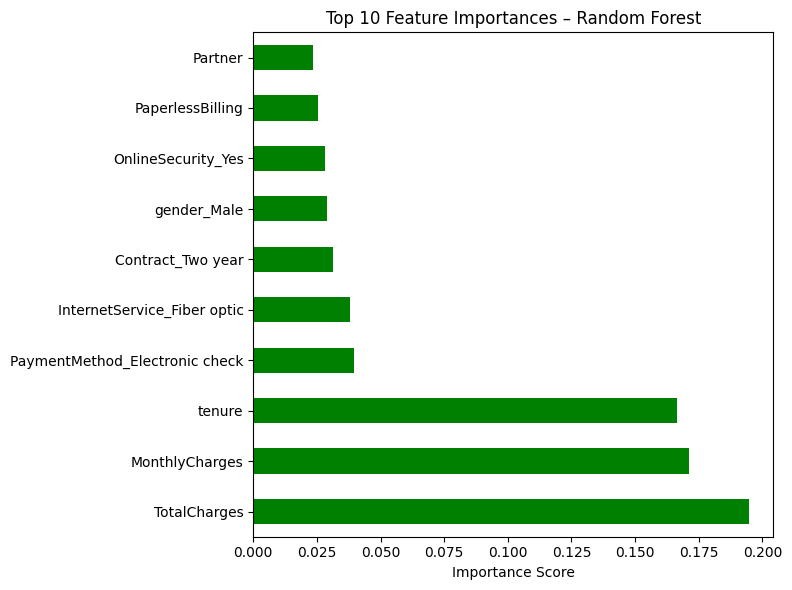

In [ ]:
# -------------------- PREPROCESSING --------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Clean 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df.drop('customerID', axis=1, inplace=True)

# Encode binary columns
le = LabelEncoder()
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode remaining categoricals
df = pd.get_dummies(df, drop_first=True)

# Split X and y
X = df.drop('Churn', axis=1)
y = df['Churn']

# -------------------- MODEL TRAINING --------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- LOGISTIC REGRESSION ---
print("📊 Logistic Regression Results:\n")
model_lr = LogisticRegression(max_iter=3000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

# --- BONUS VISUAL: LOGISTIC COEFFICIENTS ---
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_lr.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 10 Logistic Regression Coefficients (Absolute Value)")
plt.tight_layout()
plt.show()

# --- RANDOM FOREST ---
print("\n🌲 Random Forest Results:\n")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

# --- BONUS VISUAL: RANDOM FOREST FEATURE IMPORTANCE ---
rf_feat_imp = pd.Series(model_rf.feature_importances_, index=X.columns)
rf_feat_imp.nlargest(10).plot(kind='barh', figsize=(8, 6), color='green')
plt.title("Top 10 Feature Importances – Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()



⚡️ XGBoost Results:

Confusion Matrix:
 [[886 147]
 [181 193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407

ROC-AUC Score: 0.8141879474662346


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:47:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


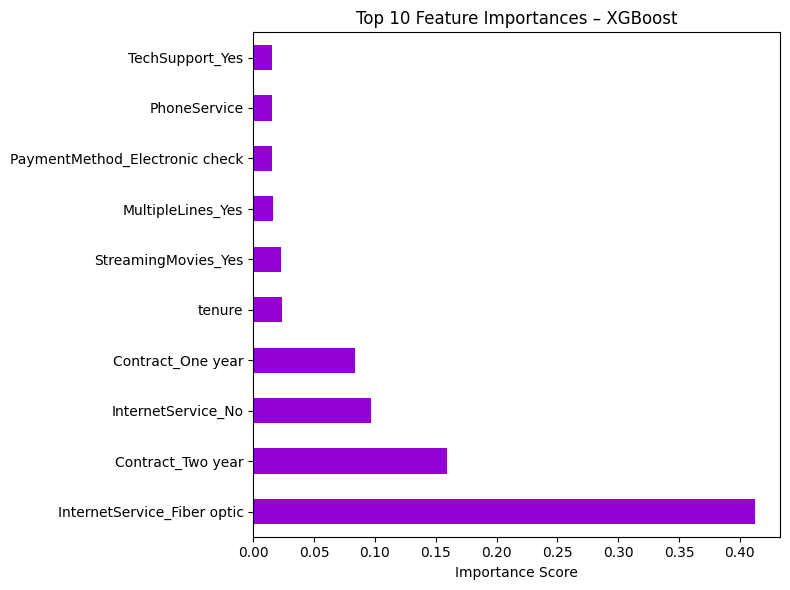

In [ ]:
# --- XGBoost Classifier ---
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd

print("\n⚡️ XGBoost Results:\n")

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))

# --- BONUS VISUAL: XGBoost Feature Importances ---
xgb_feat_imp = pd.Series(model_xgb.feature_importances_, index=X.columns)
xgb_feat_imp.nlargest(10).plot(kind='barh', figsize=(8, 6), color='darkviolet')
plt.title("Top 10 Feature Importances – XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
